## Final Project Submission

Please fill out:
* Student name: ANTONY NJOROGE
* Student pace: Part time
* Scheduled project review date/time: 29th April 2025 
* Instructor name: Sam G. Mwangi
* Blog post URL:


# Business Understanding: 
The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

Risk in aviation could relate to safety, maintenance costs, operational efficiency, regulatory compliance, or even market demand for certain types of aircraft.

## Objective: 
Determining which aircraft are the lowest risk for the company to start this new business endeavor.
Translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Understanding
The dataset ['AviationData.csv'](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) is about accidents, not operational data. It contains data about Civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 


## Setup

Import the relevant libraries, open up the `AviationData.csv` file as dataframe called `aviation_data`. 




In [74]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
aviation_data = pd.read_csv('data\AviationData.csv', encoding='latin1')

# Display the various datatypes within the dataframe
aviation_data.info()


<ipython-input-74-94beacd88b1b>:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('data\AviationData.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Step 1: Data preparation

 - Drop columns with over 50% missing values
 

In [75]:
# Drop columns with more than 50% missing values
columns_to_drop_1 = ['Latitude', 'Longitude', 'FAR.Description', 'Schedule', 'Air.carrier','Airport.Code', 'Airport.Name']
aviation_data = aviation_data.drop(columns=columns_to_drop_1)
aviation_data.isnull().sum()
aviation_data.shape

(88889, 24)

### Step 2: Data Cleaning

1. Removing rows with missing or irrelevant values in key columns like `Make`, `Model`, `Location`, `Total.Fatal.Injuries`, and `Aircraft.Category`.
2. Strip whitespaces from string columns and convert to uppercase
3. Converting numeric columns (e.g., `Total.Fatal.Injuries`) to appropriate data types
4. Filter out rows with invalid or negative injury values

In [76]:
# Drop rows with missing values in 'Make' , 'Model' and 'Location columns
aviation_data.dropna(subset=['Make', 'Model', 'Location', 'Total.Fatal.Injuries', 'Aircraft.Category'], inplace=True)

# Strip whitespaces from string columns and convert to uppercase
# This is important for consistency in data analysis
aviation_data = aviation_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
aviation_data['Make'] = aviation_data['Make'].str.upper()
aviation_data['Model'] = aviation_data['Model'].str.upper()

# Convert Total.Fatal.Injuries to numeric
aviation_data["Total.Fatal.Injuries"] = pd.to_numeric(aviation_data["Total.Fatal.Injuries"], errors="coerce")

# Filter out rows with invalid or negative injury values
aviation_data = aviation_data[aviation_data["Total.Fatal.Injuries"] >= 0]
aviation_data.shape

(28538, 24)

### Step 3: Categorize data

 - Filter data to required private and commercial airplanes
 - Filter data by Airplane category

In [77]:
# Define the custom order for sorting
custom_order = ["Personal", "Business", "Ferry", "Executive/Corporate"]

# Sort the dataframe based on the custom order
private_and_commercial = aviation_data[aviation_data['Purpose.of.flight'].isin(custom_order)].copy()
private_and_commercial['Purpose.of.flight'] = pd.Categorical(private_and_commercial['Purpose.of.flight'], categories=custom_order, ordered=True)
private_and_commercial = private_and_commercial.sort_values('Purpose.of.flight')

private_and_commercial.shape

(16584, 24)

In [78]:
airplanes_data = private_and_commercial[private_and_commercial['Aircraft.Category'] == 'Airplane']
airplanes_data.to_csv('airplanes_data.csv', index=False)

### Step 4: Analyze Risk by Aircraft Model
We will group the data by `Make` and `Model` to calculate:
- Fatality rate by `Make`
- Fatality rate by `Model`
- Popular low risk airplanes

In [79]:
X = 50

# Filter makes with at least X accidents
makes_with_min_accidents = airplanes_data.groupby('Make').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each make
fatality_rates_by_make = makes_with_min_accidents.groupby('Make').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates_by_make['fatality_rate'] = fatality_rates_by_make['total_fatalities'] / fatality_rates_by_make['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates_by_make = fatality_rates_by_make.sort_values('fatality_rate', ascending=True)


In [80]:
X = 50

# Filter models with at least X accidents
models_with_min_accidents = airplanes_data.groupby('Model').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each model
fatality_rates = models_with_min_accidents.groupby('Model').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates['fatality_rate'] = fatality_rates['total_fatalities'] / fatality_rates['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates = fatality_rates.sort_values('fatality_rate', ascending=True)


In [81]:
# Group by Make and Model
risk_analysis = airplanes_data.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Sort by Total_Fatalities to identify low-risk aircraft
low_risk_aircraft = risk_analysis.sort_values(by="Total_Fatalities", ascending=True)


In [82]:
# Group by Make and Model for popular aircraft
popular_grouped = airplanes_data.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Define a threshold for popularity (e.g., aircraft with more than 50 accidents)
popular_airplanes = popular_grouped[popular_grouped["Total_Accidents"] > 50]

# Sort by Total_Accidents in descending order
popular_airplanes = popular_grouped.sort_values(by="Total_Accidents", ascending=False)
popular_airplanes.head(10)

,Make,Model,Total_Accidents,Total_Fatalities,Avg_Fatalities_Per_Accident
854,CESSNA,172,418,102.0,0.244019
903,CESSNA,182,215,78.0,0.362791
890,CESSNA,180,184,19.0,0.103261
872,CESSNA,172N,153,76.0,0.496732
3534,PIPER,PA28,145,60.0,0.413793
429,BEECH,A36,145,118.0,0.813793
831,CESSNA,150,143,33.0,0.230769
3437,PIPER,PA-28-140,138,65.0,0.471014
846,CESSNA,152,136,30.0,0.220588
3401,PIPER,PA-18-150,132,10.0,0.075758


### Step 5: Visualization
1. Fatality risk by `Make`
2. Fatality risk by `Model`
3. Low risk airplanes

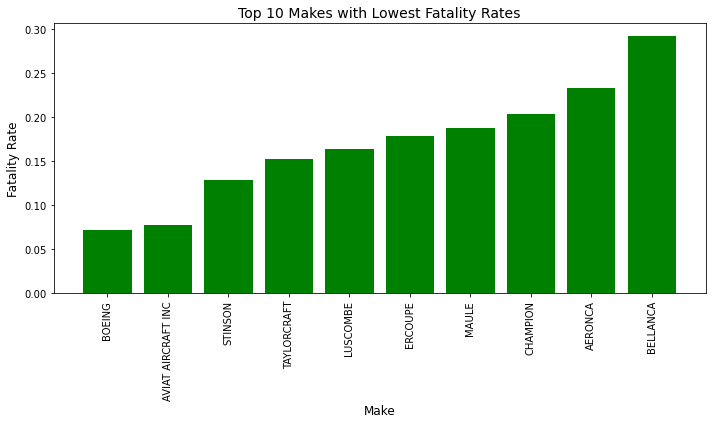

In [83]:
top_10_lowest_fatality_rates = lowest_fatality_rates_by_make.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_lowest_fatality_rates.index, top_10_lowest_fatality_rates['fatality_rate'], color='green')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Makes with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

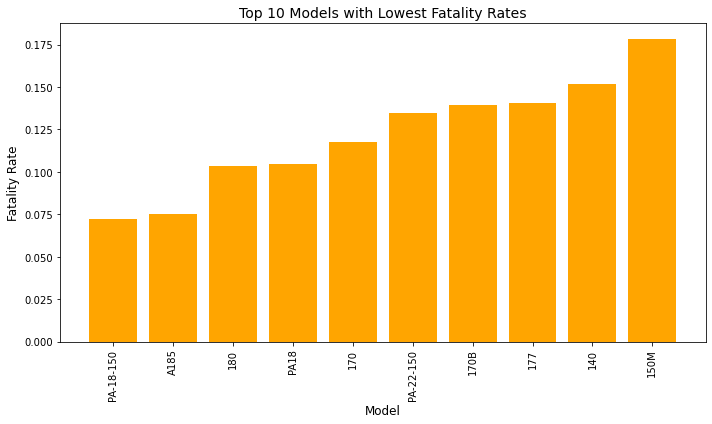

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(lowest_fatality_rates.index[:10], lowest_fatality_rates['fatality_rate'][:10], color='orange')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Models with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

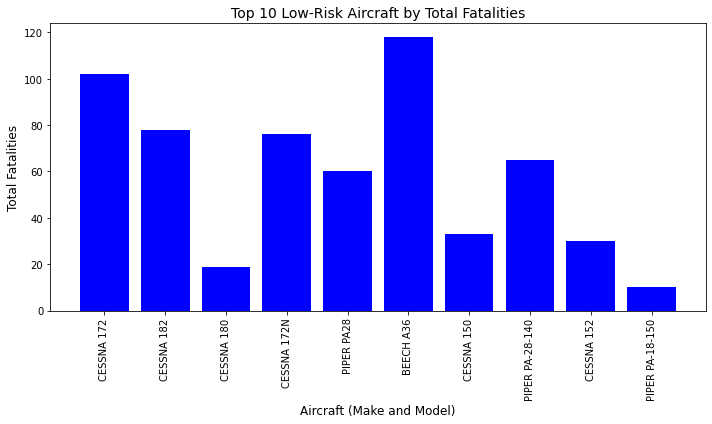

In [ ]:
# Select the top 10 low-risk popular aircraft 
top_10_low_risk_popular_aircraft = popular_airplanes.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_low_risk_popular_aircraft['Make'] + " " + top_10_low_risk_popular_aircraft['Model'], 
    top_10_low_risk_popular_aircraft['Total_Fatalities'], color='blue')
plt.xlabel('Aircraft (Make and Model)', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.title('Top 10 Low-Risk Aircraft by Total Fatalities', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Actionable Insights
Based on the analysis, we can provide the following insights to the head of the aviation division:
1. **Focus on Aircraft with Low Fatality Rates**: Aircraft models with the lowest total fatalities and average fatalities per accident are the safest choices for the business.
2. **Consider Proven Manufacturers**: Aircraft from manufacturers with consistently low accident rates (e.g., Cessna, Piper) should be prioritized.
3. **Balance Safety and Business Needs**: While safety is paramount, consider operational costs, passenger capacity, and suitability for commercial/private use when selecting aircraft.